1.Created an API Service account. - https://youtu.be/ddf5Z0aQPzY


2.Importing necessary libraries.




# SUBTASK 1
- To populate the Final Report(Google Sheet) using python

In [1]:
from oauth2client.service_account import ServiceAccountCredentials
import gspread as gs

## Authorizing Credentials

In [2]:
scope =["https://spreadsheets.google.com/feeds",'https://www.googleapis.com/auth/spreadsheets',
        "https://www.googleapis.com/auth/drive.file","https://www.googleapis.com/auth/drive"]


In [3]:
creds =ServiceAccountCredentials.from_json_keyfile_name(r"C:\Users\MAHESH DETHE\Downloads\GROUP PROJECT API KEY.json", scope)



In [4]:
client = gs.authorize(creds)

## Importing gspread dataframe

In [5]:
import gspread_dataframe as gd

- Defining the sheets and dataframes

In [6]:
file1 = client.open("BSE500").sheet1
file2 = client.open("Income&Expense").sheet1
file3 = client.open("Final Report").sheet1

In [7]:
BSE = gd.get_as_dataframe(file1)
IncExp = gd.get_as_dataframe(file2)
Report = gd.get_as_dataframe(file3)


In [8]:
BSE.head(2)

,Company,BSE code,NSE code,ISIN,Sector,Industry,Date,Price,1 day change(%),52 Week Low,...,Dividend Yield(%),EV / EBITDA,Price / Sales,Price / Cash Flow,Earning Per Share,Book Value Per Share,Cash Flow Per Share,Free Cash Flow Per Share,Dividend Per Share,Delta
0,Sanofi India Ltd.,500674.0,SANOFI,INE058A01010,Healthcare,Drugs & Pharma,2022-09-05,6158.7,0.593726,6086.3,...,7.9533,16.682293,4.980927,25.392209,425.0862,631.6506,242.956522,459.217391,490.0,0.279073
1,Page Industries Ltd.,532827.0,PAGEIND,INE761H01022,Textiles,Readymade Garments,2022-09-05,49786.2,-0.259937,31500.0,...,0.7433,51.785329,11.748089,169.843663,656.8292,1161.6259,293.088578,191.031917,370.0,0.033278


In [9]:
IncExp.head(2)

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
IncExp.columns


Index(['Date', 'Account', 'Category', 'Subcategory', 'Note', 'INR',
       'Income/Expense', 'Note.1', 'Amount', 'Currency', 'Account.1',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

Calculating Net Income and Expense

In [11]:
Net_inc = IncExp.loc[IncExp['Income/Expense'] == "Income","Account.1"].sum().astype(float)

In [12]:
Net_exp = IncExp.loc[IncExp['Income/Expense'] == "Expense","Account.1"].sum().astype(float)

In [13]:
Net_inc

59209.0

In [58]:
Net_exp

57918.28

Updating Income and Expense in Final Report

In [14]:
file3.update_cell(7,3,Net_inc)
file3.update_cell(8,3,Net_exp)


{'spreadsheetId': '17y_BoxosCm9C0oSr2S6J00E3T2qKmjLy6XRbccF1V5c',
 'updatedRange': 'Sheet1!C8',
 'updatedRows': 1,
 'updatedColumns': 1,
 'updatedCells': 1}

Updating Amt available for Investment in Final Report

In [15]:
Invest_Rs = Net_inc - Net_exp

In [16]:
file3.update_cell(24,3,Invest_Rs)


{'spreadsheetId': '17y_BoxosCm9C0oSr2S6J00E3T2qKmjLy6XRbccF1V5c',
 'updatedRange': 'Sheet1!C24',
 'updatedRows': 1,
 'updatedColumns': 1,
 'updatedCells': 1}

Defining a function so that we don't have to do the copy pasting of our column name again and again.

In [17]:
def change():
  k = input()
  print(f"{k} = IncExp.loc[IncExp['Category'] == '{k}','Account.1'].sum()")
  print(f"file3.update_cell(21,3,{k})")

# Calculating Cost incurred in every section

## Cost incurred in Food

In [18]:
Food = IncExp.loc[IncExp['Category'] == "Food","Account.1"].sum()
#updating Total Food Cost in sheet
file3.update_cell(10,3,Food)

{'spreadsheetId': '17y_BoxosCm9C0oSr2S6J00E3T2qKmjLy6XRbccF1V5c',
 'updatedRange': 'Sheet1!C10',
 'updatedRows': 1,
 'updatedColumns': 1,
 'updatedCells': 1}

## Cost incurred in Other

In [19]:
Other = IncExp.loc[IncExp['Category'] == "Other","Account.1"].sum()
#updating Total Other cost in sheet
file3.update_cell(11,3,Other)

{'spreadsheetId': '17y_BoxosCm9C0oSr2S6J00E3T2qKmjLy6XRbccF1V5c',
 'updatedRange': 'Sheet1!C11',
 'updatedRows': 1,
 'updatedColumns': 1,
 'updatedCells': 1}

## Cost incurred in Transportation

In [20]:
Transportation = IncExp.loc[IncExp['Category'] == "Transportation","Account.1"].sum()
#updating Total Transportation cost in sheet
file3.update_cell(12,3,Transportation)

{'spreadsheetId': '17y_BoxosCm9C0oSr2S6J00E3T2qKmjLy6XRbccF1V5c',
 'updatedRange': 'Sheet1!C12',
 'updatedRows': 1,
 'updatedColumns': 1,
 'updatedCells': 1}

## Cost incurred in Social Life

In [21]:
Social_Life = IncExp.loc[IncExp['Category'] == "Social Life","Account.1"].sum()
#updating Total Social Life cost in sheet
file3.update_cell(13,3,Social_Life)

{'spreadsheetId': '17y_BoxosCm9C0oSr2S6J00E3T2qKmjLy6XRbccF1V5c',
 'updatedRange': 'Sheet1!C13',
 'updatedRows': 1,
 'updatedColumns': 1,
 'updatedCells': 1}

## Cost incurred in Household

In [22]:
HouseHold = IncExp.loc[IncExp['Category'] == "HouseHold","Account.1"].sum()
#updating Total Household cost in sheet
file3.update_cell(14,3,HouseHold)

{'spreadsheetId': '17y_BoxosCm9C0oSr2S6J00E3T2qKmjLy6XRbccF1V5c',
 'updatedRange': 'Sheet1!C14',
 'updatedRows': 1,
 'updatedColumns': 1,
 'updatedCells': 1}

## Cost incurred in Apparel

In [23]:
Apparel = IncExp.loc[IncExp['Category'] == "Apparel","Account.1"].sum()
#updating Total Apparel cost in sheet
file3.update_cell(15,3,Apparel)

{'spreadsheetId': '17y_BoxosCm9C0oSr2S6J00E3T2qKmjLy6XRbccF1V5c',
 'updatedRange': 'Sheet1!C15',
 'updatedRows': 1,
 'updatedColumns': 1,
 'updatedCells': 1}

## Cost incurred in Education

In [24]:
Education = IncExp.loc[IncExp['Category'] == "Education","Account.1"].sum()
#updating Total Education cost in sheet
file3.update_cell(16,3,Education)

{'spreadsheetId': '17y_BoxosCm9C0oSr2S6J00E3T2qKmjLy6XRbccF1V5c',
 'updatedRange': 'Sheet1!C16',
 'updatedRows': 1,
 'updatedColumns': 1,
 'updatedCells': 1}

## Cost incurred in Salary

In [25]:
Salary = IncExp.loc[IncExp['Category'] == "Salary","Account.1"].sum()
#updating Total Salary cost in sheet
file3.update_cell(17,3,Salary)

{'spreadsheetId': '17y_BoxosCm9C0oSr2S6J00E3T2qKmjLy6XRbccF1V5c',
 'updatedRange': 'Sheet1!C17',
 'updatedRows': 1,
 'updatedColumns': 1,
 'updatedCells': 1}

## Cost incurred in Allowance

In [26]:
Allowance = IncExp.loc[IncExp['Category'] == "Allowance","Account.1"].sum()
#updating Total Allowance cost in sheet
file3.update_cell(18,3,Allowance)

{'spreadsheetId': '17y_BoxosCm9C0oSr2S6J00E3T2qKmjLy6XRbccF1V5c',
 'updatedRange': 'Sheet1!C18',
 'updatedRows': 1,
 'updatedColumns': 1,
 'updatedCells': 1}

## Cost incurred in Beauty

In [27]:
Beauty = IncExp.loc[IncExp['Category'] == "Beauty","Account.1"].sum()
#updating Total Beauty cost in sheet
file3.update_cell(19,3,Beauty)

{'spreadsheetId': '17y_BoxosCm9C0oSr2S6J00E3T2qKmjLy6XRbccF1V5c',
 'updatedRange': 'Sheet1!C19',
 'updatedRows': 1,
 'updatedColumns': 1,
 'updatedCells': 1}

## Cost incurred in Gift

In [28]:
Gift = IncExp.loc[IncExp['Category'] == "Gift","Account.1"].sum()
#updating Total Gift cost in sheet
file3.update_cell(20,3,Gift)

{'spreadsheetId': '17y_BoxosCm9C0oSr2S6J00E3T2qKmjLy6XRbccF1V5c',
 'updatedRange': 'Sheet1!C20',
 'updatedRows': 1,
 'updatedColumns': 1,
 'updatedCells': 1}

## Cost incurred in Petty Cash

In [29]:
Petty_cash = IncExp.loc[IncExp['Category'] == "Petty cash","Account.1"].sum()
#updating Total Petty cash in sheet
file3.update_cell(21,3,Petty_cash)

{'spreadsheetId': '17y_BoxosCm9C0oSr2S6J00E3T2qKmjLy6XRbccF1V5c',
 'updatedRange': 'Sheet1!C21',
 'updatedRows': 1,
 'updatedColumns': 1,
 'updatedCells': 1}

# SUBTASK 2

Make a new column in Gsheet 1 named “Delta” and populate it with (52 Week High - price)/(52 week High)

In [30]:
BSE.columns

Index(['Company', 'BSE code', 'NSE code', 'ISIN', 'Sector', 'Industry', 'Date',
       'Price', '1 day change(%)', '52 Week Low', '52 Week High', '3 Year Low',
       '3 Year High', '5 Year Low', '5 Year High', 'All Time Low',
       'All Time High', 'Market Cap(Cr)', 'Enterprise Value(Cr)',
       '1-Week Return', '1-Month Return', '3-Month Return(%)',
       '1-Year Return(%)', '3-Year Return', '5-Year Return(%)',
       '10-Year Return(%)', 'Price to Earnings', 'Median P/E', 'Price to Book',
       'Median P/B', 'Earning Yield(%)', 'Price earnings to growth',
       'Dividend Yield(%)', 'EV / EBITDA', 'Price / Sales',
       'Price / Cash Flow', 'Earning Per Share', 'Book Value Per Share',
       'Cash Flow Per Share', 'Free Cash Flow Per Share', 'Dividend Per Share',
       'Delta'],
      dtype='object')

In [31]:
Delta = (BSE['52 Week High']- BSE['Price'])/BSE['52 Week High']

In [32]:
BSE["Delta"] = Delta

In [33]:
BSE[BSE["Delta"] >0].head()

,Company,BSE code,NSE code,ISIN,Sector,Industry,Date,Price,1 day change(%),52 Week Low,...,Dividend Yield(%),EV / EBITDA,Price / Sales,Price / Cash Flow,Earning Per Share,Book Value Per Share,Cash Flow Per Share,Free Cash Flow Per Share,Dividend Per Share,Delta
0,Sanofi India Ltd.,500674.0,SANOFI,INE058A01010,Healthcare,Drugs & Pharma,2022-09-05,6158.70,0.593726,6086.30,...,7.9533,16.682293,4.980927,25.392209,425.0862,631.6506,242.956522,459.217391,490.0,0.279073
1,Page Industries Ltd.,532827.0,PAGEIND,INE761H01022,Textiles,Readymade Garments,2022-09-05,49786.20,-0.259937,31500.00,...,0.7433,51.785329,11.748089,169.843663,656.8292,1161.6259,293.088578,191.031917,370.0,0.033278
2,Procter & Gamble Hygiene & Health Care Ltd.,500459.0,PGHH,INE179A01014,Consumer Staples,Household & Personal Products,2022-09-05,14125.65,0.235943,12801.00,...,1.1318,52.711801,12.100589,53.168596,177.3681,227.2194,265.902649,270.468269,315.0,0.142153
3,Abbott India Ltd.,500488.0,ABBOTINDIA,INE358A01014,Healthcare,Drugs & Pharma,2022-09-05,18209.00,-1.264759,15514.00,...,1.5100,30.982268,7.730778,40.836169,380.5207,1402.9963,445.957647,446.903529,275.0,0.239214
4,Bosch Ltd.,500530.0,BOSCHLTD,INE323A01026,Automobile,Auto Ancillaries,2022-09-05,17591.10,0.130919,12932.45,...,1.1937,25.043204,4.027383,192.657100,438.1080,3734.3284,91.288136,46.677966,210.0,0.086177


Finding top 5 companies for each Higher,Lower,Moderate Risks

- High Risk Taking

In [53]:
df_HRT = BSE[(BSE["Delta"]>0) & (BSE['Market Cap(Cr)']<4000) & 
    (BSE['10-Year Return(%)']<8)].sort_values(by = ['Dividend Per Share'],ascending=False).head()

# Top 5 Companies
top_HRT = df_HRT["Company"].to_list()
top_HRT


['MOIL Ltd.',
 'Responsive Industries Ltd.',
 'Vakrangee Ltd.',
 'Hathway Cable & Datacom Ltd.',
 'Strides Pharma Science Ltd.']

- Risk Taking

In [52]:
df_RT = BSE[  (BSE["Delta"]>0) & 
              ((BSE['Market Cap(Cr)']>4000) & (BSE['Market Cap(Cr)']<8000)) & 
              ((BSE['10-Year Return(%)']>=8) & (BSE['10-Year Return(%)']<15))].sort_values(by = ['Dividend Per Share'],
                                                                              ascending=False).head()

# Top 5 Companies
top_RT = df_RT["Company"].to_list()
top_RT

['The Great Eastern Shipping Company Ltd.',
 'Welspun Corp Ltd.',
 'Jyothy Labs Ltd.',
 'Gujarat State Fertilizers & Chemicals Ltd.',
 'NCC Ltd.']

- Moderate Risk Taking

In [54]:
df_MRT = BSE[  (BSE["Delta"]>0) & 
              ((BSE['Market Cap(Cr)']>8000) & (BSE['Market Cap(Cr)']<15000)) & 
              ((BSE['10-Year Return(%)']>=15) & (BSE['10-Year Return(%)']<20))].sort_values(by = ['Dividend Per Share'],
                                                                              ascending=False).head()

# Top 5 Companies
top_MRT = df_MRT["Company"].to_list()
top_MRT

['Cyient Ltd.',
 'Chambal Fertilisers & Chemicals Ltd.',
 'Redington India Ltd.',
 'BASF India Ltd.',
 'Zydus Wellness Ltd.']

- Low Risk Taking

In [55]:
df_LRT = BSE[(BSE["Delta"]>0) & (BSE['Market Cap(Cr)']>15000) & 
    (BSE['10-Year Return(%)']>=20)].sort_values(by = ['Dividend Per Share'],ascending=False).head()

# Top 5 Companies
top_LRT = df_LRT["Company"].to_list()
top_LRT


['Page Industries Ltd.',
 'Abbott India Ltd.',
 'MRF Ltd.',
 'Bajaj Holdings & Investment Ltd.',
 'Honeywell Automation India Ltd.']

In [41]:

no = str(file3.cell(24,3).value)     #Defining variable for investment cell
no =no.replace(",","")
ava_invest =float(no)


Changing dropdown - IF else condition 

In [57]:
m = file3.cell(24,3)

if m.value == "Moderate Risk Taking":
    for i in range(1,6):
        file3.update_cell(10+i,6,top_MRT[i-1])
        file3.update_cell(10+i,7,ava_invest/5)
elif m.value == "High Risk Taking":
    for i in range(1,6):
        file3.update_cell(10+i,6,top_HRT[i-1])
        file3.update_cell(10+i,7,ava_invest/5)
elif m.value == "Low Risk Taking":
    for i in range(1,6):
        file3.update_cell(10+i,6,top_LRT[i-1])
        file3.update_cell(10+i,7,ava_invest/5) 
else :
    for i in range(1,6):
        file3.update_cell(10+i,6,top_RT[i-1])
        file3.update_cell(10+i,7,ava_invest/5)           

# SUBTASK 3

Compare the median of column Enterprise Value(Cr) across different Sectors. 
For instance,what is the median enterprise value of Technology sector as compared to Services sector.

In [44]:
import seaborn as sns

In [45]:
data = BSE[["Enterprise Value(Cr)","Sector"]].groupby(["Sector"]).median()
data.reset_index(inplace = True)
data

,Sector,Enterprise Value(Cr)
0,Automobile,35909.058989
1,Capital Goods,12998.279783
2,Chemicals,13704.383222
3,Communication,42214.500000
4,Construction,10062.273456
5,Consumer Discretionary,13239.340020
6,Consumer Staples,16451.253229
7,Diversified,24475.606015
8,Energy,63786.424084
9,Financial,31462.740540


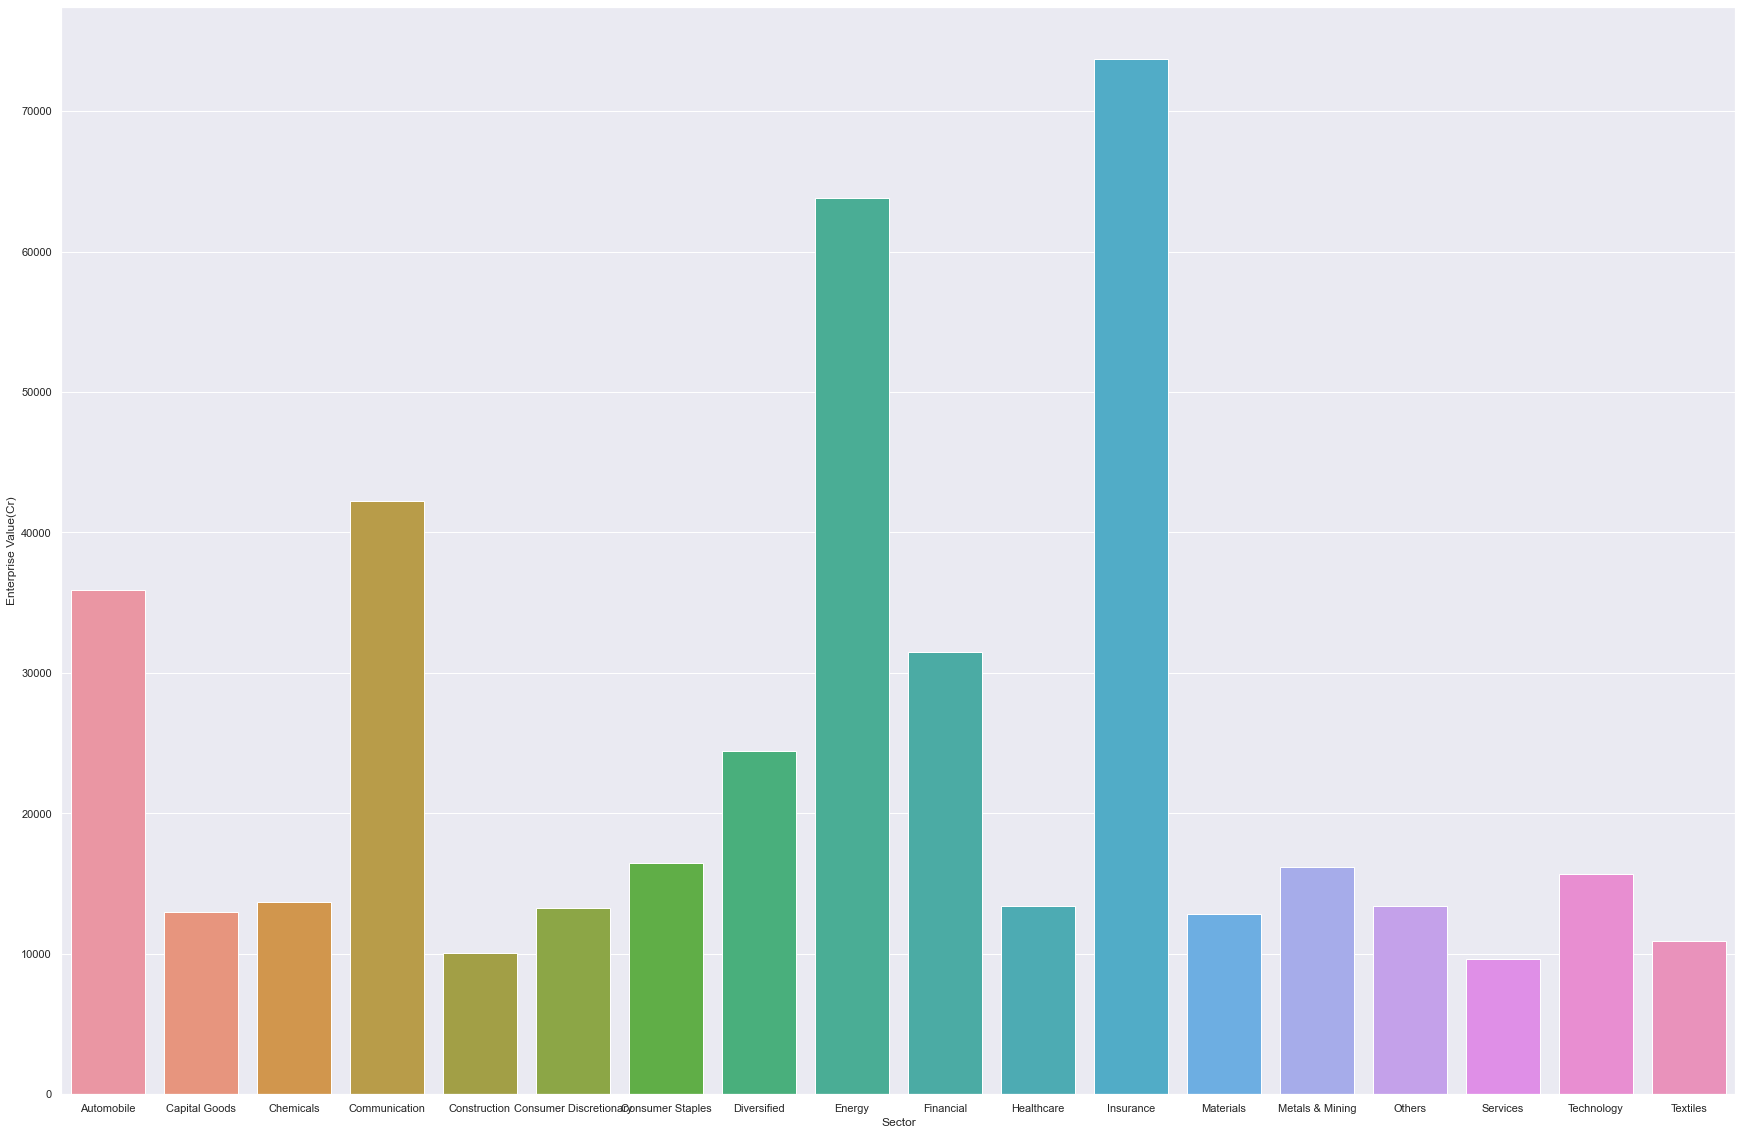

In [69]:
x = data["Sector"]
y = data["Enterprise Value(Cr)"]
sns.barplot(x= x,y = y ,data = data)
sns.set(rc = {"figure.figsize":(20,25)})

 a relation between Dividend Per Share with Market Cap(Cr)

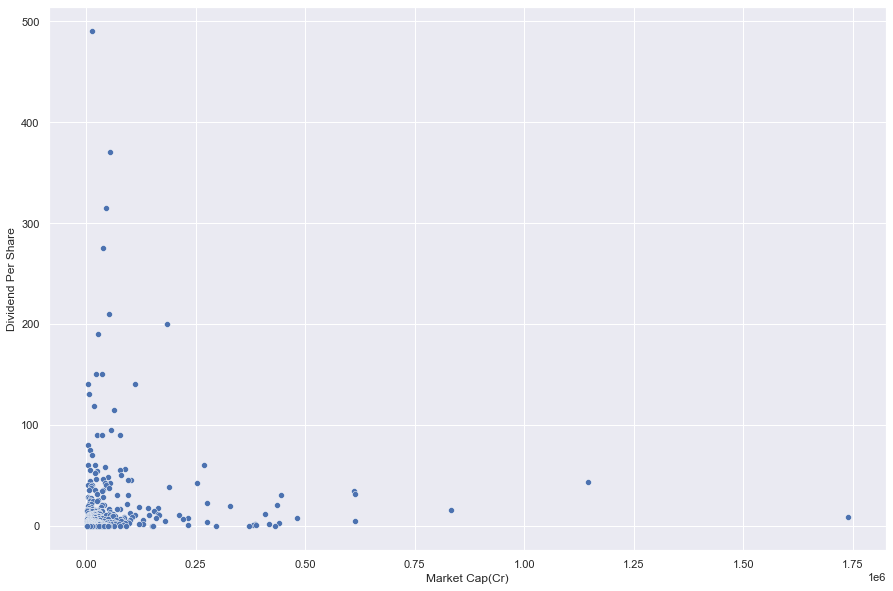

In [56]:
sns.scatterplot(x = BSE["Market Cap(Cr)"] ,y = BSE['Dividend Per Share'])
sns.set(rc = {"figure.figsize":(15,10)})

Count the companies in different Industry with positive and negative 3-Year Return. For instance how many companies in Drugs & Pharma industry have positive 3-Year Return and how many have that negative. Basis this, decide which industry would you recommend someone to invest if the same return is followed

In [86]:
df1 = BSE.loc[BSE["3-Year Return"]<0,["Industry","Company"]].groupby("Industry").count().reset_index()
df2 = BSE.loc[BSE["3-Year Return"]>0,["Industry","Company"]].groupby("Industry").count().reset_index()
df1.merge(df2,how = "inner",on = "Industry")

,Industry,Company_x,Company_y
0,ACs & Refrigerators,2,4
1,Air Transport,1,1
2,Asset Management Companies,1,1
3,Auto Ancillaries,1,9
4,Banking,10,15
5,Cement,1,13
6,Communication Equipment,1,3
7,Construction,2,5
8,Drugs & Pharma,5,31
9,E-Commerce,1,3


Come up with any one KPI which can help define the best stock across different Sector, you may need to learn a little bit of Finance for the same

### Average 1 year Return Percentage